# Assignment

Before evaluating the code:
* If you haven't used Jupter Notebooks before checkout https://jupyter.org/ for more information.
* Familirize yourself with OMERO.web inteface with the details provided in the email.
  * OMERO.web client overview: https://help.openmicroscopy.org/web-client.html
  * OMERO metadata concepts: http://help.openmicroscopy.org/managing-data.html#annotating
  * General documentation: https://docs.openmicroscopy.org/omero/5.6.1/index.html
  * Developer documentation: https://docs.openmicroscopy.org/omero/5.6.1/developers/index.html
  * OMERO Python bindings: https://docs.openmicroscopy.org/omero/5.6.1/developers/Python.html

### Import required OMERO packages

In [ ]:
import omero
from omero.gateway import BlitzGateway
from getpass import getpass

## Connect to OMERO server

In [ ]:
HOST = "omero-server-address"
gateway = BlitzGateway(
    username=input("Username: "),
    passwd=getpass("OMERO Password: "),
    host=HOST,
    secure=True)
print("Connected: {}".format(gateway.connect()))

# WARM UP

## User info

In [ ]:
user = gateway.getUser()
print("Current user:")
print("   ID: {}".format(user.getId()))
print("   Username: {}".format(user.getName()))
print("   Full Name: {}".format(user.getFullName()))
print("Member of:")
for g in gateway.getGroupsMemberOf():
    print("   ID: {}, Name: {}".format(g.getName(), g.getId()))
group = gateway.getGroupFromContext()
print("Current group: {}".format(group.getName()))

## List Images in a Dataset

In [ ]:
dataset_id = 10152  # https://idr.openmicroscopy.org/webclient/?show=dataset-10152
dataset = gateway.getObject("Dataset", dataset_id)
print("\nImages in Dataset: {}".format(dataset.getName()))
for image in dataset.listChildren():
    print("  Name: {}, Id: {}".format(image.name, image.id))

# TASK 1

List images in the Project called: "idr0038-held-kidneylightsheet/experimentA".

1. Use `gateway` object or OMERO.web client to find the Project ID.
2. Create `CSV` file with the Project, Dataset and Image details. Expected header in the cell below.
3. Use python's `csv` module to create a new spreadsheet file and save it.
4. Attach the CSV together with the Notebook as an assignment result.

In [ ]:
import csv

In [ ]:
HEADER = ['Project Name', 'Project Id', 'Dataset Name', 'Dataset Id', 'Image Name', 'Image Id',
          'Image Size X', 'Image Size Y', 'Image Size Z', 'Image Size C', 'Image Size T']

In [ ]:
# Add your code here
project_id = 

# TASK 2

1. Retrieve a raw image plane for image id: 9621401, channel index 0, z-section index 0 and timepoint index 0.
2. Calculate min, max, mean and median intensity of the plane using `numpy` librabry.
3. Encode the result as a JSON object and print it.

`matplotlib` is installed so you can visualise the plane before performing calculations.

In [ ]:
import numpy

In [ ]:
image_id = 9621401  # https://idr.openmicroscopy.org/webclient/?show=image-9621401

In [ ]:
# Add your code here

# TASK 3

1. Use the QueryService to find images annotated with Key="Organism Part" and Value="kidney" (MapAnnotation) for the Female cohort. Search only the images within the project "idr0073-schaadt-immuneinfiltrates/experimentA" (https://idr.openmicroscopy.org/webclient/?show=project-1002).
2. Create a `CSV` file with the result. Name the file "search_report.csv"
3. Attach the "search_report.csv" to the email with the Notebook as an assignment result.

Note: "Diagnosis", "Organism Part", "Medical Condition", "Sex", "Age", "Individual" are Key names from MapAnnotations attached to each image in the "idr0073-schaadt-immuneinfiltrates/experimentA" project.


In [ ]:
import csv

In [ ]:
HEADER = ['Image Name', 'Image Id', "Diagnosis", "Organism Part", "Medical Condition", "Sex", "Age", "Individual"]

In [ ]:
# Add your code here

# TASK 4 - 7 Intro

For the assignments 4 through to 7 you will be asked to perform data processing tasks. All the tasks are focused on the experimental and the analytical data derived from the Hight Content Screening (https://en.wikipedia.org/wiki/High-content_screening) dataset BBBC013: https://bbbc.broadinstitute.org/BBBC013 published by Broad Bioimage Benchmark Collection.

You can familiarize yourself with the HSC data type and its representation in OMERO by exploring a similar dataset here: https://idr.openmicroscopy.org/webclient/?show=screen-2001.

# TASK 4

1. Using "BBBC013_v1_platemap_all.txt", available on https://bbbc.broadinstitute.org/BBBC013, create a metadata table that describes the experimental conditions. The metadata table should contain a row per well with the information about the experimental well status: compound, dosage and whether the well was used as a control, and the control type.
2. Using the metadata table create a dosage heatmap plot, e.g. https://seaborn.pydata.org/generated/seaborn.heatmap.html, where heatmap rows and columns represent the Plate rows and columns and the color represents the drug dosage. You can extend the metadata table with the columns and values needed for creating the plot. Remember to label the axes using HCS well labels as shown here: https://data.broadinstitute.org/bbbc/BBBC013/visual_plate_map.png
3. Save the metadata table to a CSV file called "BBBC013_metadata.csv"
4. Attach the "BBBC013_metadata.csv" to the email with the Notebook as an assignment result.

In [ ]:
# Add your imports here

In [ ]:
# Add your metadata table creation code here

In [ ]:
# Add the heatmap code here

# TASK 5

The CellProfilerResults directory contains CellProfiler (https://cellprofiler.org) image processing outputs. All the BBBC013 images were analyzed using the pipeline that can be found in the directory. The pipeline was designed to identify cells and nuclei objects. Example results of the nuclear segmentation below:

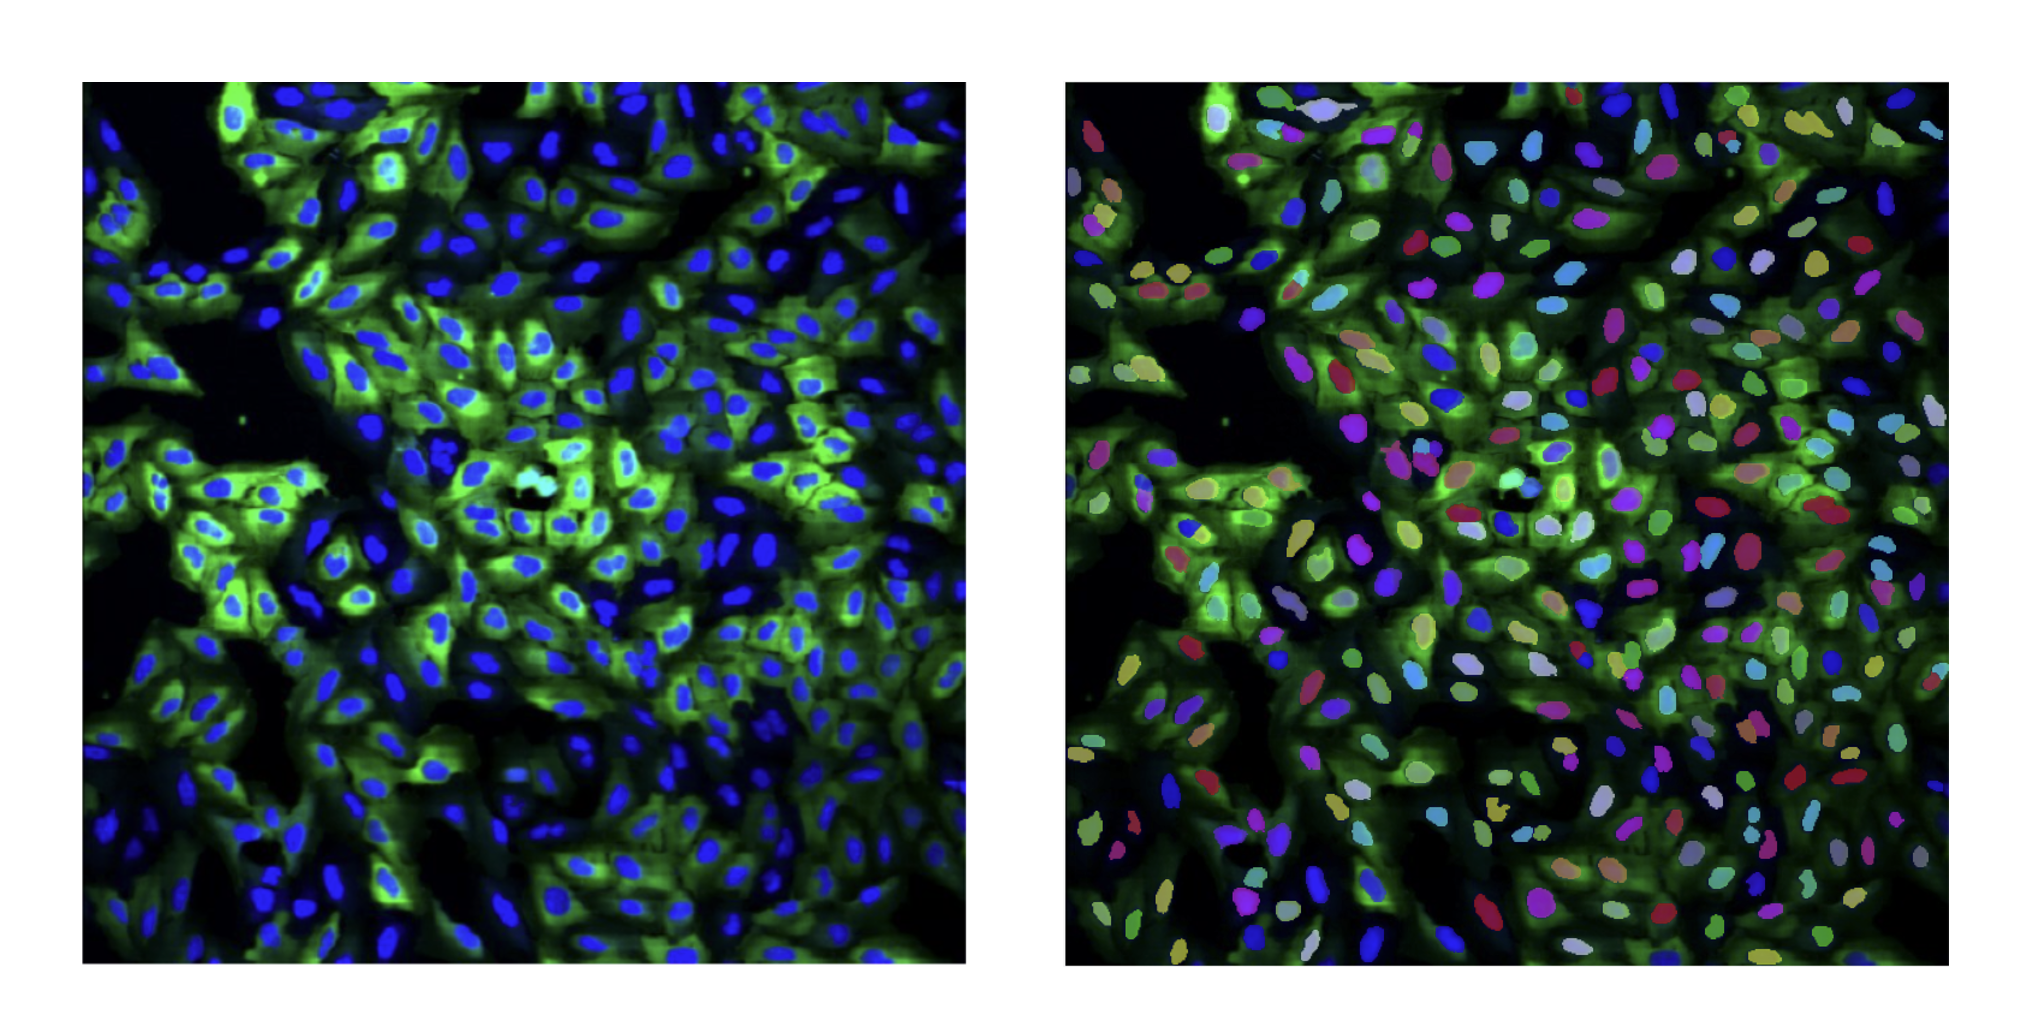

1. Extend the metadata table from Task 4 by the nuclei and the cells measurements. The "BBBC013_Nuclei.csv.gz" and "BBBC013_Cells.csv.gz" files contain the single object measurements, "image_list.csv.gz" contains the information necessary to link the "ImageNumber" column with the wells in the metadata table. To summarize the object level measurements, calculate mean values of the features and add the object count for each well for each object type (nuclei, cell).
2. Print the first 15 rows of the resulting table in the "# Result" cell.

In [ ]:
# Add your imports here

In [ ]:
# Add your code here

In [ ]:
# Result

# TASK 6

1.	Since the image processing can produce strongly correlated features that can skew any downstream processing, propose a feature selection procedure for the object level analytics from Task 5.
2.	Using the procedure delete the highly correlated data for the nuclei objects table.

In [ ]:
# Add your imports here

In [ ]:
# Add your code here

# TASK 7

1. Using the plate metadata and the "cleaned up" nuclei analytics from the tasks 4 - 6 create a classifier capable to differentiate between Positive and Negative control nuclei.
2. Using the classifier find the number of positive and negative cells for each dosage level.
3. Create a visualization of your choosing to show the number of positive and negative cells versus dosage.
4. Determine/demonstrate the accuracy of your classifier.

In [ ]:
# Add your imports here

In [ ]:
# Add your code here

# TASK 8 (optional)

1. Use `numpy` to convert the plane from Task 2 to a binary mask by setting the threshold level to 60.
2. Show the resulting binary using matplotlib.
3. Save the image in "PNG" format and attach it with the Notebook to the email.


In [ ]:
# Add your code here

# TASK 9 (optional)

1. Segment the image plane from Task 2 using `scipy` and/or `skimage` library.
2. Display the original or thresholded image using `matplotlib`.
2. Add Points to the plot at the object centroid location. Set the point color to red.
4. Find the bounding boxes around segmentated objects and add them to the plot.
5. Save image in "PNG" format and attach it with the Notebook as an assignment result.

`scipy` and `skimage` are installed. Ta make use of them you'll have to import the right modules first.

In [ ]:
# Add your imports here

In [ ]:
# Add your code here

# TASK 10 (optional)

1. Calculate stats: min, max, median, mean intesity for the following three image regions:
    * Region A: (5200, 4000, 1000, 1000)
    * Region B: (7000, 6000, 1000, 1000)
    * Region C: (6500, 6700, 1000, 1000)

   For image Id: 9798456, where region is defined as (x0, y0, width, height). x0, y0 defines top left corner of the region.
2. Calculate the stats for all three channels.
3. Encode the stats as json object.
4. Calculate intensity histograms for all the three regions and show them side by side for comparison.
5. Save the histogram plot as an image in "PNG" format and attach it with the Notebook as an assignment result.

**Tip**: This is a large tiled image, do not try to read the whole image plane using pixels.getPlane() method. You should only load the regions defined by the ROIs using pixels.getTile() method.

In [ ]:
image_id = 9798456

In [ ]:
# Add your code here